# clean eda

# 1. Importing relevant libraries

In [45]:
#Data Manipulation libraries
import pandas as pd 
import numpy as np

In [46]:
#Data Visualization libraries - EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 2. Data importing - Initial preprocessing

In [47]:
#Importing data
data = pd.read_excel('default of credit card clients.xls',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [48]:
# Generic info about variables - datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [49]:
# Checking for missing values
print(data.isna().sum())
print()
print('Total missing values:', data.isna().sum().sum(), 'missing values')

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Total missing values: 0 missing values


In [50]:
'''
Function for initial preprocessing of the data:
1) replace EDUCATION values 0, 5, 6 with 4 ('other' category) since they are not mentioned in the data description
2) replace MARRIAGE value 0 with 3 ('other' category) as there is not a 0 category for marriage column on data description 
3) drop 'ID' column - useless
4) rename target column to DEFAULT, rename PAY_0 to PAY_1 for consistency and more accurate variable names
'''
def initial_preprocessing(df):
    print('EDUCATION values before preprocessing:\n',df['EDUCATION'].value_counts())
    df['EDUCATION'].replace([0,5,6],4,inplace=True)
    print()
    print('EDUCATION values after preprocessing:\n',df['EDUCATION'].value_counts())
    print()
    print('MARRIAGE values before preprocessing:\n',df['MARRIAGE'].value_counts())
    df['MARRIAGE'].replace(0,3,inplace=True)
    print()
    print('MARRIAGE values after preprocessing:\n',df['MARRIAGE'].value_counts())
    df.drop(columns='ID',inplace=True)
    df.rename(columns={"default payment next month": "DEFAULT","PAY_0": "PAY_1"},inplace=True)
    
    return df
    

In [51]:
#perform initial preprocessing
data = initial_preprocessing(data)

EDUCATION values before preprocessing:
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

EDUCATION values after preprocessing:
 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

MARRIAGE values before preprocessing:
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

MARRIAGE values after preprocessing:
 2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


In [52]:
#checking the imbalance of the dataset
data.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [53]:
#checking the imbalance of the dataset
data.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

# 3. EDA Plots

## 3.1. Distribution of default cases

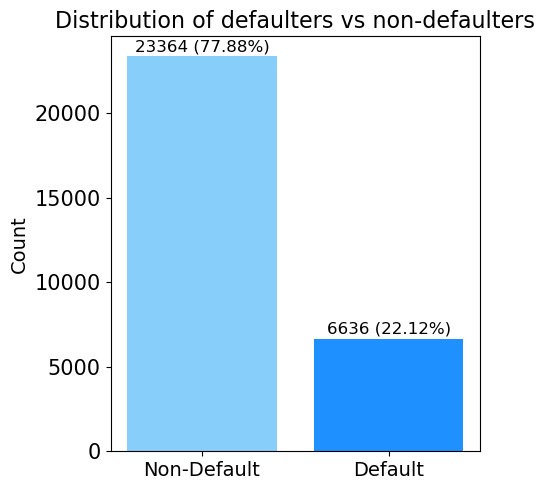

In [54]:
#Distribution of defaulters vs non-defaulters
default_counts = data['DEFAULT'].value_counts()
total_samples = len(data)

# Calculate percentages
default_percent = (default_counts / total_samples) * 100
non_default_percent = 100 - default_percent

# Create bar plot 
plt.figure(figsize=(5, 5))
bars = plt.bar(default_counts.index, default_counts.values, color=['lightskyblue', 'dodgerblue'])
plt.ylabel('Count',fontsize=14)
plt.title('Distribution of defaulters vs non-defaulters',fontsize=16)
plt.xticks(default_counts.index, ['Non-Default', 'Default'],fontsize=14)
plt.yticks(fontsize=15)
plt.tight_layout()

# Display count and percentages
for index, count in enumerate(default_counts):
    plt.text(index, count + 300, f'{count} ({default_percent[index]:.2f}%)', ha='center',fontsize=12)

plt.show()

## 3.2. Default by sociodemographic features

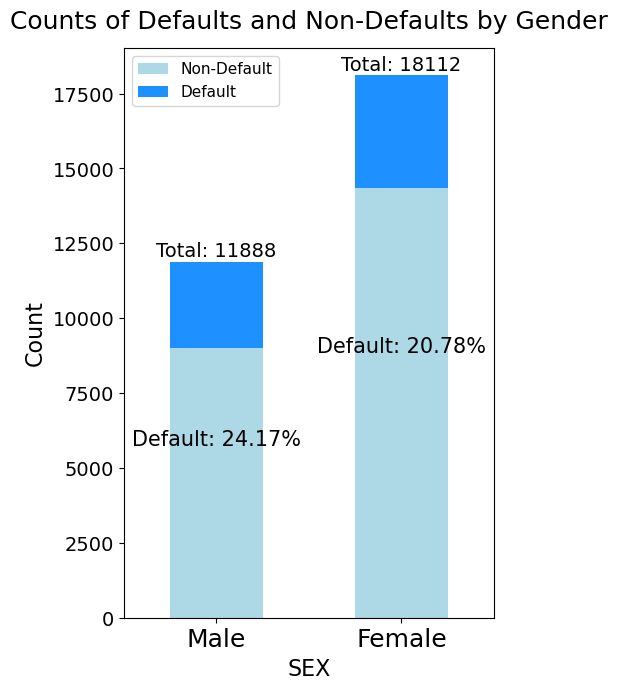

In [55]:
# Counts of defaults and non-defaults by gender
gender_counts = data.groupby(['SEX', 'DEFAULT']).size().unstack(fill_value=0)
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(5, 7)) 

# Create a bar plot
gender_counts.plot(kind='bar', stacked=True, color=['lightblue', 'dodgerblue'], ax=ax)
ax.set_xlabel('SEX', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Counts of Defaults and Non-Defaults by Gender', fontsize=18, y=1.02)
plt.xticks([0, 1], ['Male', 'Female'], rotation=0, fontsize=18)  
plt.yticks(fontsize=14)
ax.legend(labels=['Non-Default', 'Default'], fontsize=11)
plt.tight_layout()


for i, (gender_count, gender_percentage) in enumerate(zip(gender_counts.values, gender_percentages.values)):
    total_count = sum(gender_count)
    default_percentage = gender_percentage[1]
    ax.text(i, total_count / 2, f'Default: {default_percentage:.2f}%', 
            ha='center', va='center', color='black', fontsize=15)
    ax.text(i, total_count + 160, f'Total: {total_count}',
            ha='center', color='black', fontsize=14)

plt.show()

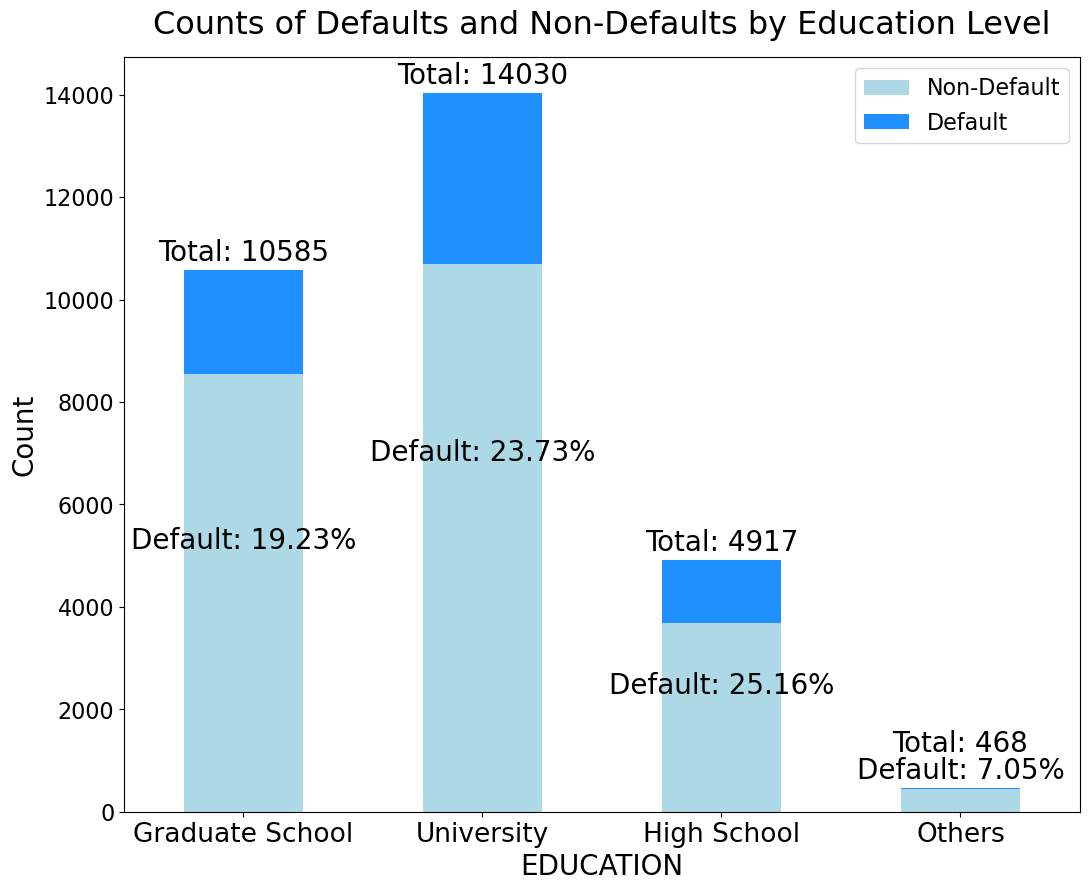

In [56]:
# Counts of defaults and non-defaults by education level - plot
education_counts = data.groupby(['EDUCATION', 'DEFAULT']).size().unstack(fill_value=0)
education_percentages = education_counts.div(education_counts.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(11, 9))

# Create a bar plot
education_counts.plot(kind='bar', stacked=True, color=['lightblue', 'dodgerblue'], ax=ax)
ax.set_xlabel('EDUCATION',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('Counts of Defaults and Non-Defaults by Education Level',fontsize=23, y=1.02)
x_positions = range(len(education_counts))
x_labels = ['Graduate School', 'University', 'High School', 'Others']
ax.set_xticks(ticks=x_positions)
ax.set_xticklabels(x_labels, rotation=0,fontsize=19)
ax.legend(labels=['Non-Default', 'Default'],fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Annotations
for i, (education_count, education_percentage) in enumerate(zip(education_counts.values[:-1], 
                                                                education_percentages.values[:-1])):
    total_count = sum(education_count)
    default_percentage = education_percentage[1]
    ax.text(i, total_count / 2, f'Default: {default_percentage:.2f}%',
            ha='center', va='center', color='black',fontsize=20)
    ax.text(i, total_count + 180, f'Total: {total_count}',
            ha='center', color='black',fontsize=20)

others_total_count = sum(education_counts.values[-1])
others_default_percentage = education_percentages[1][4]
ax.text(len(x_positions) - 1, others_total_count + 700, f'Total: {others_total_count}',
        ha='center', color='black',fontsize=20)
ax.text(len(x_positions) - 1, others_total_count + 180, f'Default: {others_default_percentage:.2f}%',
        ha='center', color='black',fontsize=20)

plt.show()

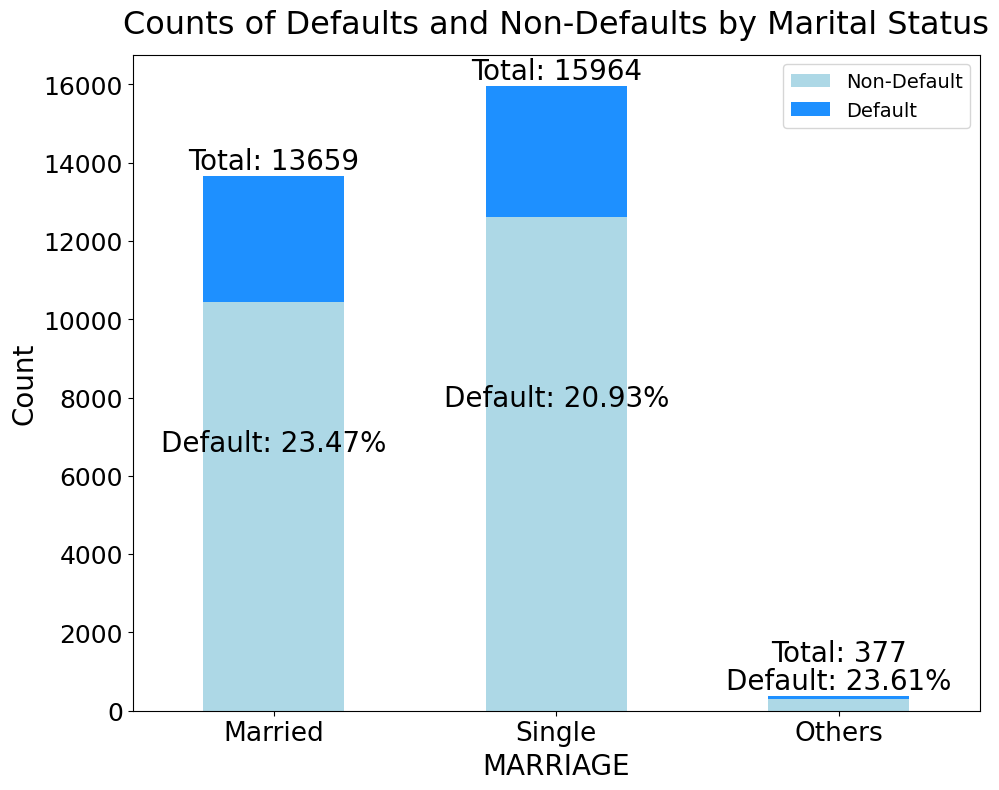

In [57]:
# Counts of defaults and non-defaults by marital level - plot
marital_counts = data.groupby(['MARRIAGE', 'DEFAULT']).size().unstack(fill_value=0)
marital_percentages = marital_counts.div(marital_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
marital_counts.plot(kind='bar', stacked=True, color=['lightblue', 'dodgerblue'], ax=ax)
ax.set_xlabel('MARRIAGE',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('Counts of Defaults and Non-Defaults by Marital Status',fontsize=23, y=1.02)
x_positions = range(len(marital_counts))
x_labels = ['Married', 'Single', 'Others']
ax.set_xticks(ticks=x_positions)
ax.set_xticklabels(x_labels, rotation=0,fontsize=19)
ax.legend(labels=['Non-Default', 'Default'],fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()

# Annotations
for i, (marital_count, marital_percentage) in enumerate(zip(marital_counts.values[:-1], 
                                                            marital_percentages.values[:-1])):
    total_count = sum(marital_count)
    default_percentage = marital_percentage[1]
    ax.text(i, total_count / 2, f'Default: {default_percentage:.2f}%',
            ha='center', va='center', color='black',fontsize=20)
    ax.text(i, total_count + 180, f'Total: {total_count}', 
            ha='center', color='black',fontsize=20)

others_total_count = sum(marital_counts.values[-1])
others_default_percentage = marital_percentages[1][3]
ax.text(len(x_positions) - 1, others_total_count + 900, 
        f'Total: {others_total_count}', ha='center', color='black',fontsize=20)
ax.text(len(x_positions) - 1, others_total_count + 180, 
        f'Default: {others_default_percentage:.2f}%', ha='center', color='black',fontsize=20)
plt.show()


## 3.3. Proportion of defaults by static numerical features (LIMIT_BAL, AGE)

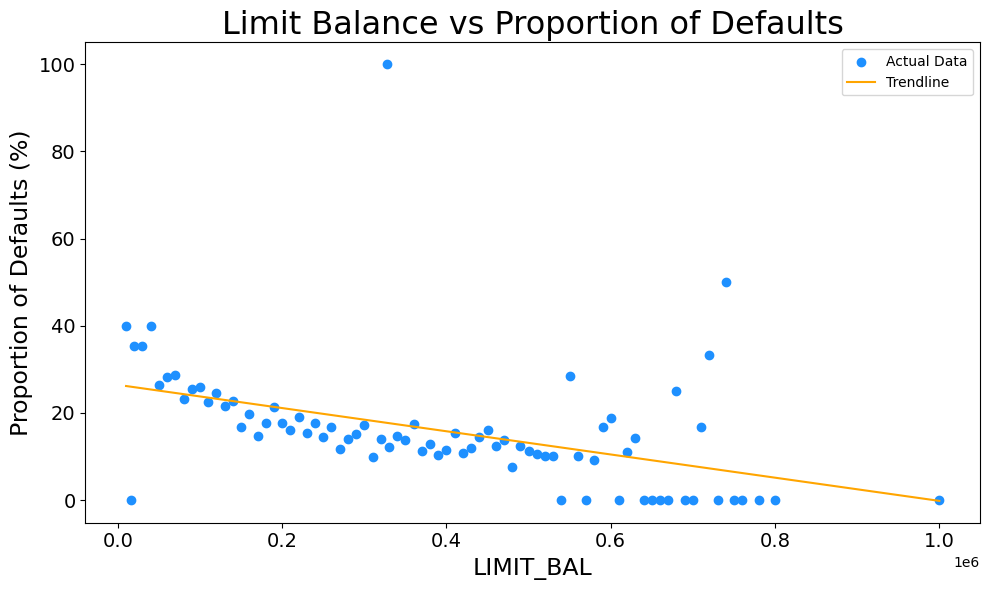

In [58]:
# Limit balance vs Proportion of defaults plot 
limitbal_counts = data.groupby('LIMIT_BAL')['DEFAULT'].count()
limitbal_defaults = data.groupby('LIMIT_BAL')['DEFAULT'].sum()
limitbal_default_percentages = (limitbal_defaults / limitbal_counts) * 100
x = np.array(limitbal_defaults.index).reshape(-1, 1)

# Fit linear regression line
model = LinearRegression()
model.fit(x, limitbal_default_percentages)
predicted_y = model.predict(x)

#Create plot
plt.figure(figsize=(10, 6))
plt.scatter(limitbal_defaults.index, limitbal_default_percentages.values, color='dodgerblue', label='Actual Data')
plt.plot(x, predicted_y, color='orange', label='Trendline')
plt.xlabel('LIMIT_BAL',fontsize=17)
plt.ylabel('Proportion of Defaults (%)',fontsize=17)
plt.title('Limit Balance vs Proportion of Defaults',fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()

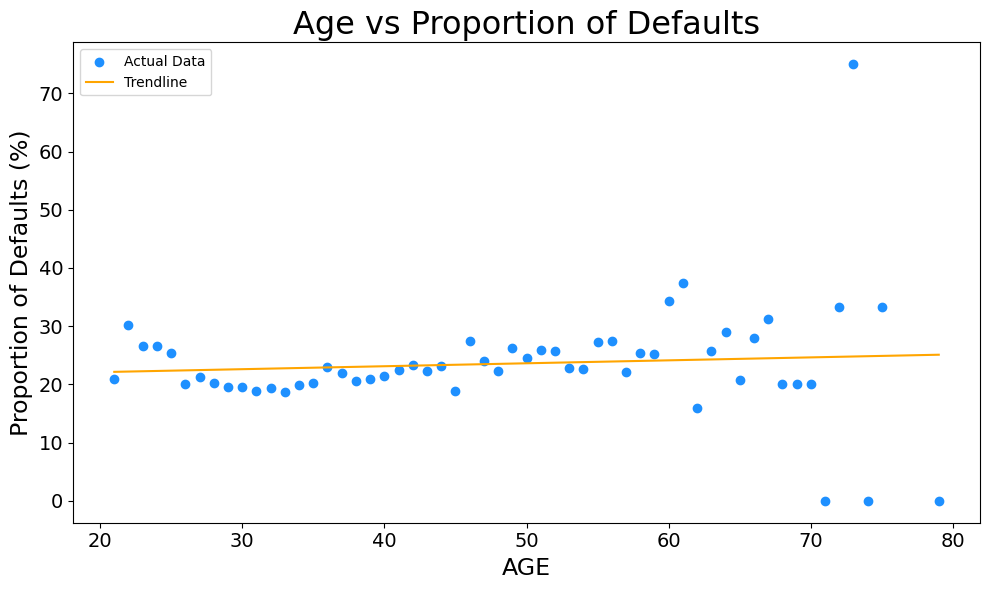

In [59]:
# Age vs Proportion of defaults plot
age_counts = data.groupby('AGE')['DEFAULT'].count()
age_defaults = data.groupby('AGE')['DEFAULT'].sum()
age_default_percentages = (age_defaults / age_counts) * 100
x = np.array(age_defaults.index).reshape(-1, 1)

# Fit linear regression line
model = LinearRegression()
model.fit(x, age_default_percentages)
predicted_y = model.predict(x)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(age_defaults.index, age_default_percentages.values, color='dodgerblue', label='Actual Data')
plt.plot(x, predicted_y, color='orange', label='Trendline')
plt.xlabel('AGE',fontsize=17)
plt.ylabel('Proportion of Defaults (%)',fontsize=17)
plt.title('Age vs Proportion of Defaults',fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()


## 3.4. Correlation Matrix for Temporal Features

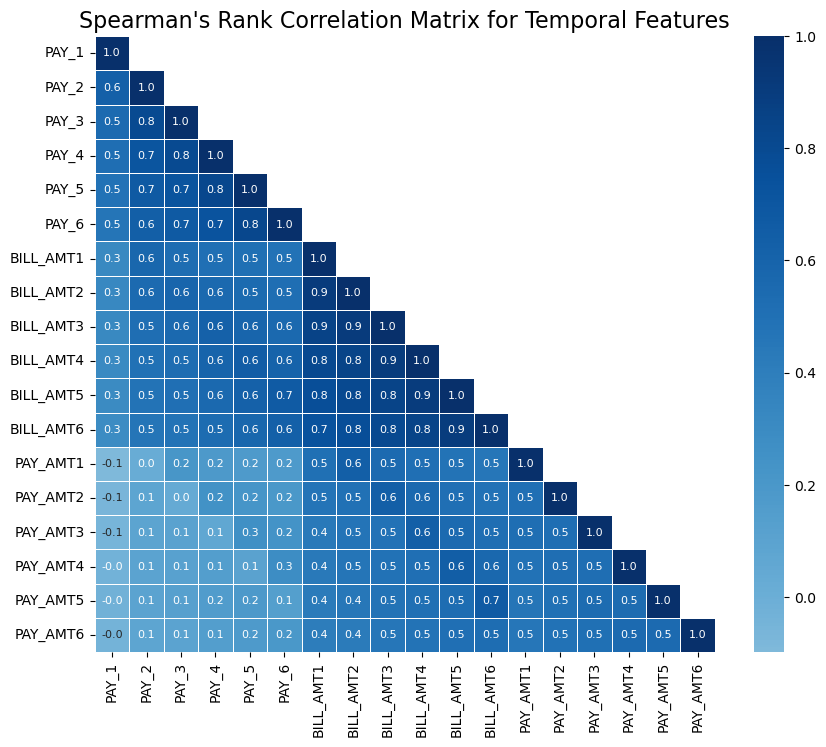

In [60]:
#Spearman's correlation matrix for temporal features
temporal_features = data[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                        "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                        "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]


correlation_matrix = temporal_features.corr(method="spearman")
mask = np.triu(np.ones(correlation_matrix.shape), k=1)
# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, linewidths=0.5,
            annot_kws={"size": 8, "ha": "center"},
            fmt=".1f", mask=mask)
plt.title("Spearman's Rank Correlation Matrix for Temporal Features",fontsize=16)
plt.show()

## 3.5. Boxplots - Distribution Plots for numerical variables

In [61]:
#numerical columns
numerical_cols = ['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

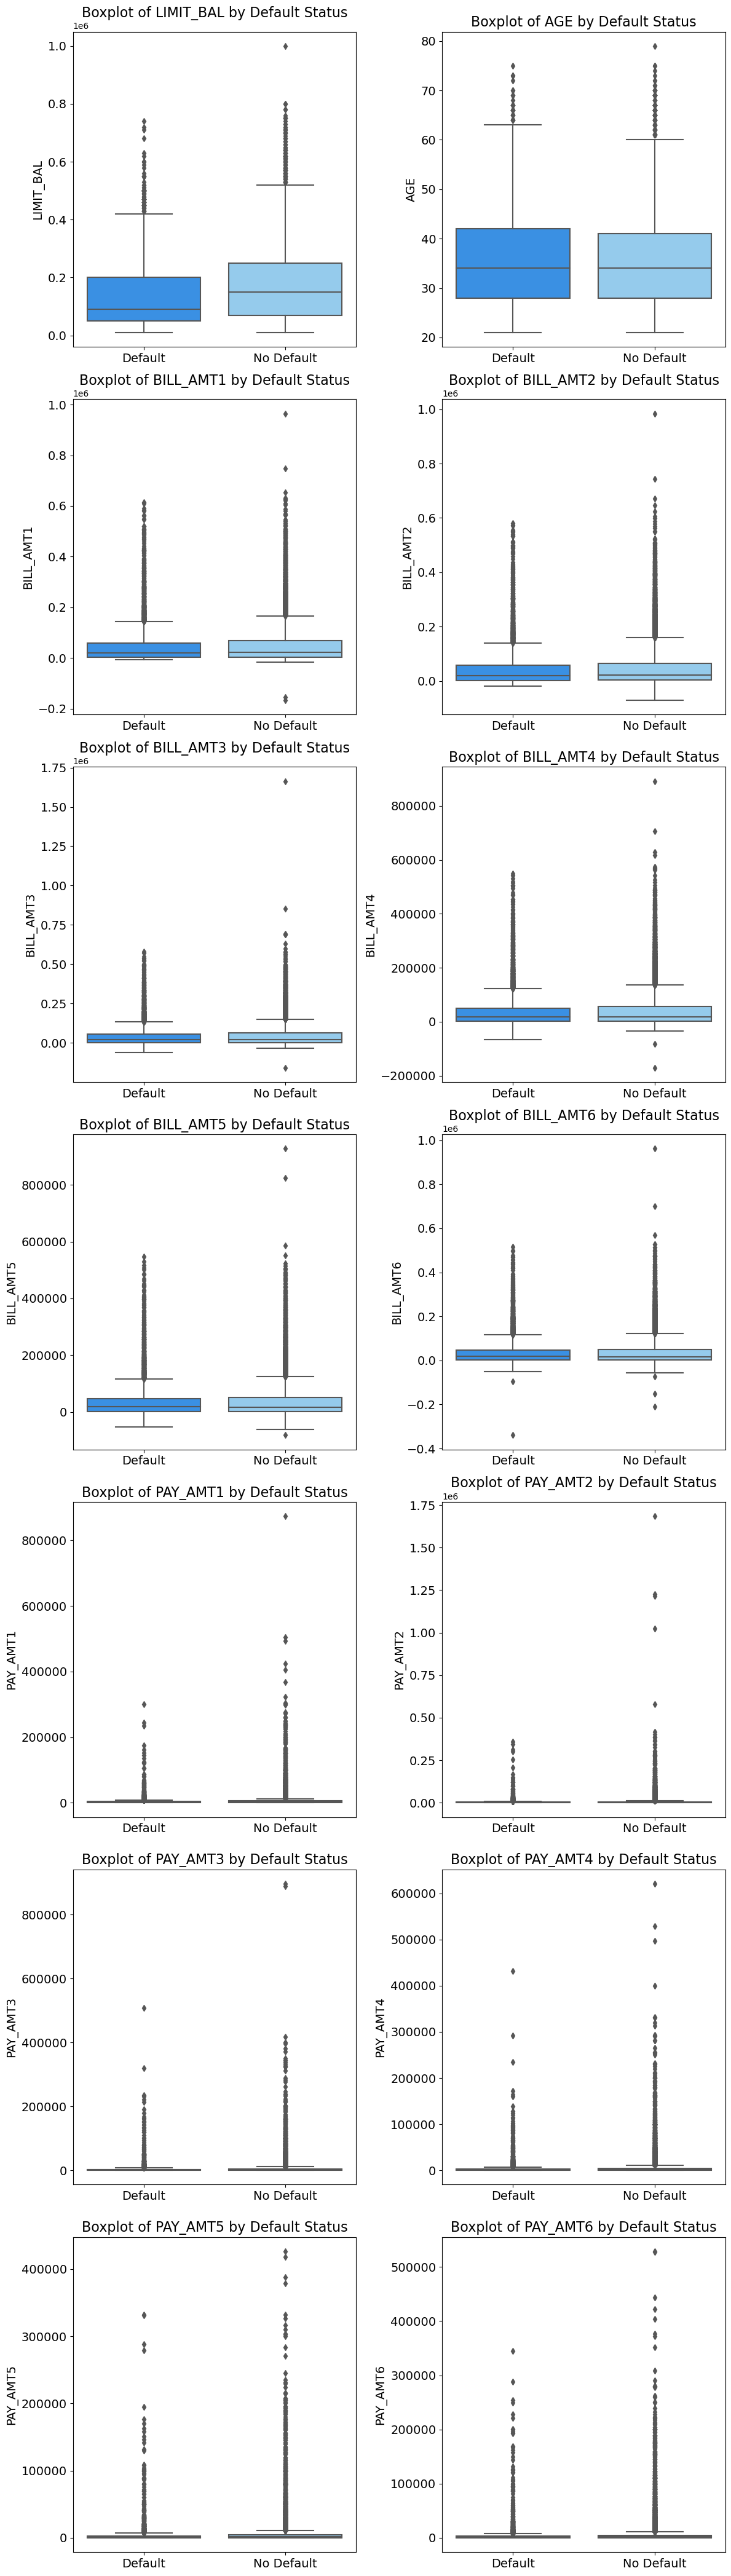

In [62]:
# Create boxplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols) // 2, ncols=2, figsize=(12, 6 * len(numerical_cols) // 2))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, x=data['DEFAULT'].map({0: 'No Default', 1: 'Default'}),
                y=col, ax=axes[i], palette=['dodgerblue', 'lightskyblue'])
    axes[i].set_title(f'Boxplot of {col} by Default Status', fontsize=16)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(col,fontsize=14)
    axes[i].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()


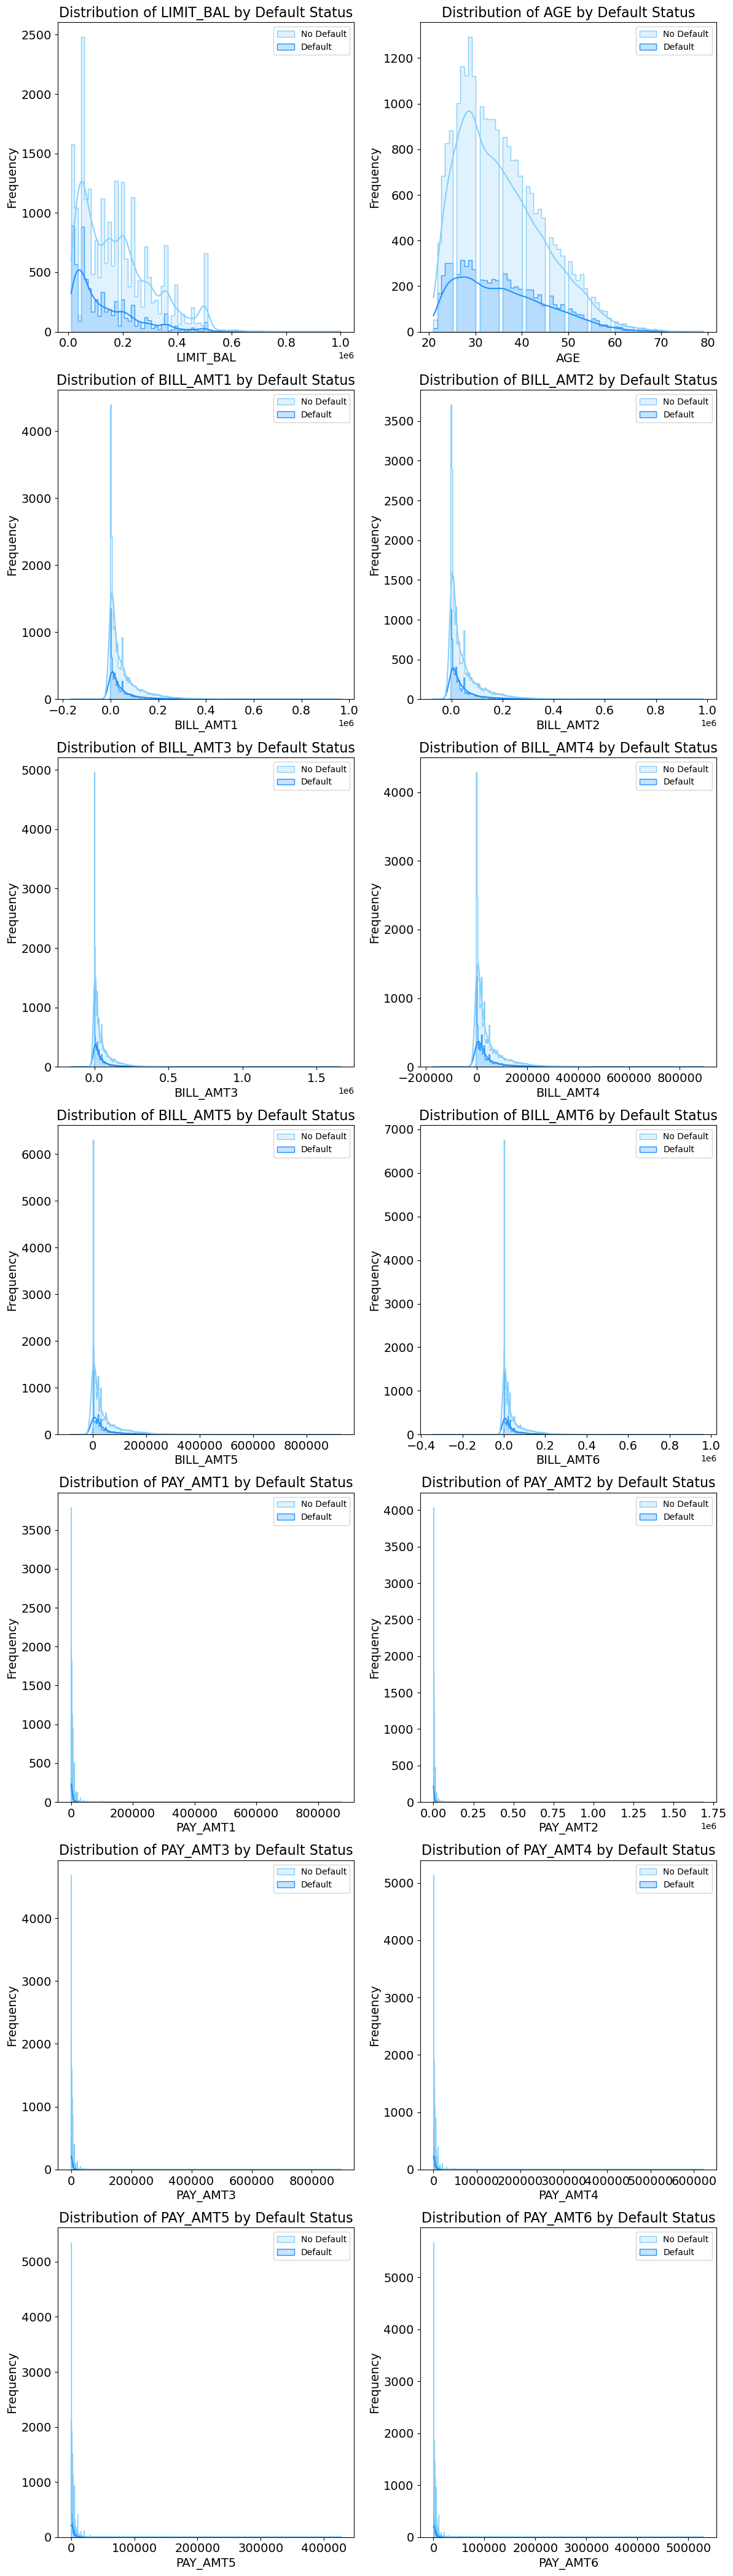

In [63]:
# Create distribution plots for each numerical column 
fig, axes = plt.subplots(nrows=len(numerical_cols) // 2, ncols=2, figsize=(12, 6 * (len(numerical_cols) // 2)))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    ax = sns.histplot(data=data, x=col, hue='DEFAULT', ax=axes[i],
                      kde=True, element='step', palette=['lightskyblue', 'dodgerblue'])
    ax.set_title(f'Distribution of {col} by Default Status', fontsize=16)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

    legend = ax.get_legend()
    legend.set_title(None)
    new_labels = {'0': 'No Default', '1': 'Default'}
    for t, l in zip(legend.texts, new_labels.values()):
        t.set_text(l)

plt.tight_layout()
plt.show()